In [1]:
import numpy as np
import pandas as pd
import os

## Funções e Configurações

In [2]:
# this dictionary contains the configuration necessary to divide each dataset used in the work, the script is made
# for the conll type of datasets, so if you want to add datasets to divide, make sure to add it here
gen_config = {
    'leNER':{
        'base_dir': "../Base de Dados/leNER/",
        'load_dir': "documents/allDoc/",
        'save_dir': "divisions/iterative/",
        'col_sep' : ' ',
        'file_type': '.conll',
    },
    'UlyssesNER-BR':{
        'base_dir': "../Base de Dados/UlyssesNER-BR/",
        'load_dir': "PL_Corpus_byTypes_conll/",
        'save_dir': "divisions/iterative/",
        'col_sep' : ' ',
        'file_type': '.conll',
    },
    'Harem-second':{
        'base_dir': "../Base de Dados/HAREM/",
        'load_dir': "SecondHarem/documents",
        'save_dir': "divisions/second/iterative/",
        'col_sep' : '\t',
        'file_type': '.conll',
    }
}

In [3]:
def get_sentencas(corpus, coll_sep):
        sentenca = []
        for line in corpus:
            if line == '\n':
                if sentenca:
                    yield sentenca
                    sentenca = []
            else:
                
                sentenca.append(line.strip('\n').split(coll_sep))
        if sentenca:
            yield sentenca

In [4]:
def read_dataset(filepath,coll_sep):
    data_por_sentenca = []
    with open(filepath, "r") as corpus:
        data_por_sentenca += list(get_sentencas(corpus,coll_sep))
    
    return data_por_sentenca

In [5]:
def get_data(config, selective = False, fileName = ""):
    load_dir = config['base_dir'] + config['load_dir']
    sep = config['col_sep']
    if selective:
        fp = load_dir + fileName
        return read_dataset(filepath=fp, coll_sep=sep)
    else:
        filepaths = []
        for file in os.listdir(load_dir):
            if file.endswith(config['file_type']):
                filepaths.append(load_dir + file)
        
        data_por_sentenca = []
        for filepath in filepaths:
            print(filepath+"\n")
            data_por_sentenca += read_dataset(filepath=filepath, coll_sep=sep)
        
        return data_por_sentenca

In [6]:
def split_token_label(data):
    return list(map(list,zip(*data)))

## Carregando DataSet e preparando dados

In [7]:
# dataset = 'leNER'
# dataset = 'Paramopama'
# dataset = 'Harem-mini'
# dataset = 'Harem-second'
dataset = 'UlyssesNER-BR'

config = gen_config[dataset]

filepaths = []

files = os.listdir(config['base_dir'] + config['load_dir'])
print("Arquivos listados:", files)

for file in files:
    filepaths.append(config['base_dir'] + config['load_dir'] + file)

folder_path = '../Base de Dados/UlyssesNER-BR/PL_Corpus_byTypes_conll/'  # Ajuste do caminho
data_por_sentenca_por_doc = {}

# Verificar se o caminho existe
if os.path.exists(folder_path):
    print("Caminho existe:", folder_path)
    # Listar arquivos dentro da pasta
    for file in os.listdir(folder_path):
        filepath = os.path.join(folder_path, file)
        
        # Verificar se é um arquivo
        if os.path.isfile(filepath):
            data_por_sentenca_por_doc[file] = read_dataset(filepath, coll_sep=config['col_sep'])
else:
    print(f"O diretório {folder_path} não existe. Verifique o caminho.")

# Exibir resultado
total_documentos = len(data_por_sentenca_por_doc)
print("Total de documentos carregados:", total_documentos)


Arquivos listados: ['EQUIPE2-DIA1-PL-1478-2011_corrigido.conll', 'EQUIPE2-DIA5-PL-4668-2019_corrigido.conll', 'EQUIPE2-DIA5-PRC-27-2011_corrigido.conll', 'EQUIPE1-DIA3-PL-639-2011_corrigido.conll', 'EQUIPE2-DIA5-PL-4746-2019_corrigido.conll', 'EQUIPE1-DIA4-PLP-68-2011_corrigido.conll', 'EQUIPE2-DIA1-PLP-191-2019_corrigido.conll', 'EQUIPE2-DIA4-PL-989-2015_corrigido.conll', 'EQUIPE1-DIA5-PL-2479-2011_corrigido.conll', 'EQUIPE2-DIA2-PL-4765-2019_corrigido.conll', 'EQUIPE2-DIA4-PL-777-2011_corrigido.conll', 'EQUIPE1-DIA4-PL-8293-2014_corrigido.conll', 'EQUIPE1-DIA2-PL-4610-2019_corrigido.conll', 'EQUIPE2-DIA2-PL-776-2011_corrigido.conll', 'EQUIPE1-DIA1-PL-728-2011_corrigido.conll', 'EQUIPE1-DIA1-PL-4748-2019_corrigido.conll', 'EQUIPE1-DIA1-PL-3813-2012_corrigido.conll', 'EQUIPE2-DIA2-PL-4649-2019_corrigido.conll', 'EQUIPE2-DIA1-PL-1253-2011_corrigido.conll', 'EQUIPE2-DIA3-PL-4895-2019_corrigido.conll', 'EQUIPE1-DIA5-PL-874-2011_corrigido.conll', 'EQUIPE2-DIA3-PRC-193-2016_corrigido.conll'

In [8]:
# data_por_sentenca_por_doc['HAREMdoc_aa64686'][0]
# len(data_por_sentenca_por_doc['HAREMdoc_aa64686'])
# data_por_sentenca_por_doc[list(data_por_sentenca_por_doc.keys())[0]]
# d = list(data_por_sentenca_por_doc.values())[0][10][-1]
# list(map(list,zip(d)))
# # d

In [9]:
from collections import Counter
labels_por_doc = {}

for docName, docData in data_por_sentenca_por_doc.items():
    allDocData = []
    
    for sentence in docData:
        allDocData += [i for i in sentence]
    
    docTokens, docLabels = split_token_label(allDocData)
    
    
    labels_por_doc[docName] = docLabels

    labels_count = Counter(docLabels)
    
    # Armazenar a contagem de rótulos para o documento atual
    labels_por_doc[docName] = dict(labels_count)

# Exibir as contagens de rótulos por documento
for doc, labels_count in labels_por_doc.items():
    print(f"Documento: {doc}")
    print("Contagem de rótulos:", labels_count)
    print()

Documento: EQUIPE2-DIA1-PL-1478-2011_corrigido.conll
Contagem de rótulos: {'O': 399, 'B-DATA': 3, 'B-PESSOAindividual': 2, 'I-PESSOAindividual': 4, 'B-FUNDlei': 4, 'I-FUNDlei': 31, 'B-PRODUTOoutros': 6, 'I-PRODUTOoutros': 12, 'B-ORGgovernamental': 3, 'I-ORGgovernamental': 5, 'I-DATA': 2, 'B-PESSOAcargo': 1}

Documento: EQUIPE2-DIA5-PL-4668-2019_corrigido.conll
Contagem de rótulos: {'O': 681, 'B-DATA': 2, 'B-PESSOAindividual': 2, 'I-PESSOAindividual': 2, 'B-FUNDlei': 3, 'I-FUNDlei': 39, 'B-EVENTO': 1, 'B-PESSOAcargo': 1}

Documento: EQUIPE2-DIA5-PRC-27-2011_corrigido.conll
Contagem de rótulos: {'O': 230, 'B-DATA': 3, 'B-PESSOAindividual': 4, 'I-PESSOAindividual': 4, 'B-LOCALconcreto': 7, 'I-LOCALconcreto': 47, 'B-PESSOAcargo': 8, 'B-ORGgovernamental': 5, 'I-ORGgovernamental': 21, 'I-PESSOAcargo': 2}

Documento: EQUIPE1-DIA3-PL-639-2011_corrigido.conll
Contagem de rótulos: {'O': 829, 'B-DATA': 3, 'B-PESSOAindividual': 2, 'B-FUNDlei': 5, 'I-FUNDlei': 40, 'B-ORGgovernamental': 2, 'I-ORGgov

In [10]:
# labels_por_doc['HAREMdoc_aa64686'][-12]
# len(labels_por_doc['HAREMdoc_aa64686'])

In [11]:
from collections import Counter

# Inicializar um dicionário para armazenar contagens de rótulos por documento
# antes e depois de simplificar.
labels_por_doc = {}
labels_por_doc_simplificado = {}

for docName, docData in data_por_sentenca_por_doc.items():
    allDocData = []
    
    # Concatenar todas as sentenças de um documento em uma lista
    for sentence in docData:
        allDocData += [i for i in sentence]
    
    # Separar tokens e rótulos
    docTokens, docLabels = split_token_label(allDocData)
    
    # Contagem de rótulos com os prefixos (original)
    labels_count_original = Counter(docLabels)
    labels_por_doc[docName] = dict(labels_count_original)
    
    # Extração da última parte do rótulo (ex. 'B-PER' vira 'PER')
    labels_simplificados = [lbl.split('-')[-1] for lbl in docLabels]
    labels_count_simplificado = Counter(labels_simplificados)
    labels_por_doc_simplificado[docName] = dict(labels_count_simplificado)

# Exibir a contagem original e simplificada para comparação
for doc in labels_por_doc.keys():
    print(f"Documento: {doc}")
    print("Contagem de rótulos (original):", labels_por_doc[doc])
    print("Contagem de rótulos (simplificado):", labels_por_doc_simplificado[doc])
    print()

# Exibir o total de documentos
print("Total de documentos:", len(labels_por_doc))



Documento: EQUIPE2-DIA1-PL-1478-2011_corrigido.conll
Contagem de rótulos (original): {'O': 399, 'B-DATA': 3, 'B-PESSOAindividual': 2, 'I-PESSOAindividual': 4, 'B-FUNDlei': 4, 'I-FUNDlei': 31, 'B-PRODUTOoutros': 6, 'I-PRODUTOoutros': 12, 'B-ORGgovernamental': 3, 'I-ORGgovernamental': 5, 'I-DATA': 2, 'B-PESSOAcargo': 1}
Contagem de rótulos (simplificado): {'O': 399, 'DATA': 5, 'PESSOAindividual': 6, 'FUNDlei': 35, 'PRODUTOoutros': 18, 'ORGgovernamental': 8, 'PESSOAcargo': 1}

Documento: EQUIPE2-DIA5-PL-4668-2019_corrigido.conll
Contagem de rótulos (original): {'O': 681, 'B-DATA': 2, 'B-PESSOAindividual': 2, 'I-PESSOAindividual': 2, 'B-FUNDlei': 3, 'I-FUNDlei': 39, 'B-EVENTO': 1, 'B-PESSOAcargo': 1}
Contagem de rótulos (simplificado): {'O': 681, 'DATA': 2, 'PESSOAindividual': 4, 'FUNDlei': 42, 'EVENTO': 1, 'PESSOAcargo': 1}

Documento: EQUIPE2-DIA5-PRC-27-2011_corrigido.conll
Contagem de rótulos (original): {'O': 230, 'B-DATA': 3, 'B-PESSOAindividual': 4, 'I-PESSOAindividual': 4, 'B-LOCAL

In [12]:
# labels_por_doc['HAREMdoc_aa64686'][-12]
# len(labels_por_doc['HAREMdoc_aa64686'])

In [13]:
lbl_list = []
for lbl in labels_por_doc.values():
    lbl_list.extend(lbl)  # Adiciona os rótulos de cada documento à lista

# Filtrando 'B-OUTRO' e 'I-OUTRO'
lbl_list = [label for label in lbl_list if label not in ['B-OUTRO', 'I-OUTRO']]

# Obtendo os rótulos únicos
unique_lbl_list = list(set(lbl_list))

# Exibindo a lista de rótulos únicos
print(unique_lbl_list)




['B-PRODUTOsistema', 'B-PRODUTOoutros', 'I-ORGgovernamental', 'I-PESSOAgrupocargo', 'I-ORGpartido', 'B-PESSOAgrupocargo', 'B-PESSOAindividual', 'B-DATA', 'B-FUNDprojetodelei', 'B-EVENTO', 'I-ORGnaogovernamental', 'I-PRODUTOoutros', 'I-EVENTO', 'B-PESSOAcargo', 'B-ORGnaogovernamental', 'B-LOCALconcreto', 'I-PRODUTOprograma', 'B-FUNDlei', 'I-PESSOAindividual', 'B-ORGgovernamental', 'I-PRODUTOsistema', 'B-FUNDapelido', 'I-FUNDprojetodelei', 'I-FUNDlei', 'O', 'I-LOCALconcreto', 'B-PRODUTOprograma', 'I-PESSOAcargo', 'I-DATA', 'B-LOCALvirtual', 'B-ORGpartido', 'I-FUNDapelido', 'I-LOCALvirtual']


In [14]:
unique_lbl_list.pop(unique_lbl_list.index('O'))
unique_lbl_list

['B-PRODUTOsistema',
 'B-PRODUTOoutros',
 'I-ORGgovernamental',
 'I-PESSOAgrupocargo',
 'I-ORGpartido',
 'B-PESSOAgrupocargo',
 'B-PESSOAindividual',
 'B-DATA',
 'B-FUNDprojetodelei',
 'B-EVENTO',
 'I-ORGnaogovernamental',
 'I-PRODUTOoutros',
 'I-EVENTO',
 'B-PESSOAcargo',
 'B-ORGnaogovernamental',
 'B-LOCALconcreto',
 'I-PRODUTOprograma',
 'B-FUNDlei',
 'I-PESSOAindividual',
 'B-ORGgovernamental',
 'I-PRODUTOsistema',
 'B-FUNDapelido',
 'I-FUNDprojetodelei',
 'I-FUNDlei',
 'I-LOCALconcreto',
 'B-PRODUTOprograma',
 'I-PESSOAcargo',
 'I-DATA',
 'B-LOCALvirtual',
 'B-ORGpartido',
 'I-FUNDapelido',
 'I-LOCALvirtual']

In [15]:
unique_lbl_list = sorted(unique_lbl_list)
unique_lbl_list

['B-DATA',
 'B-EVENTO',
 'B-FUNDapelido',
 'B-FUNDlei',
 'B-FUNDprojetodelei',
 'B-LOCALconcreto',
 'B-LOCALvirtual',
 'B-ORGgovernamental',
 'B-ORGnaogovernamental',
 'B-ORGpartido',
 'B-PESSOAcargo',
 'B-PESSOAgrupocargo',
 'B-PESSOAindividual',
 'B-PRODUTOoutros',
 'B-PRODUTOprograma',
 'B-PRODUTOsistema',
 'I-DATA',
 'I-EVENTO',
 'I-FUNDapelido',
 'I-FUNDlei',
 'I-FUNDprojetodelei',
 'I-LOCALconcreto',
 'I-LOCALvirtual',
 'I-ORGgovernamental',
 'I-ORGnaogovernamental',
 'I-ORGpartido',
 'I-PESSOAcargo',
 'I-PESSOAgrupocargo',
 'I-PESSOAindividual',
 'I-PRODUTOoutros',
 'I-PRODUTOprograma',
 'I-PRODUTOsistema']

In [16]:
#test_l = ['LOCAL', 'ORGANIZACAO', 'PESSOA', 'TEMPO', 'LOCAL', 'ORGANIZACAO', 'PESSOA', 'TEMPO', 'LOCAL', 'ORGANIZACAO', 'PESSOA', 'TEMPO', 'TEMPO', 'TEMPO']
#[test_l.count(x) for x in unique_lbl_list]

In [17]:
from collections import Counter

initial_set = []
for s_idx, s_labels in enumerate(list(labels_por_doc.values())):
    # Contagem eficiente dos rótulos usando Counter
    label_count = Counter(s_labels)
    
    # Adicionando o índice do documento e as contagens para cada rótulo em unique_lbl_list
    initial_set.append([s_idx] + [label_count.get(x, 0) for x in unique_lbl_list])

# Verificando o tamanho de initial_set (número de documentos)
print(len(initial_set))


150


In [18]:
# initial_set[:, 1:]

In [19]:
# Adicionando a linha final com os totais de cada label (soma dos rótulos)
initial_set.append(['-'] + [sum(x) for x in zip(*(row[1:] for row in initial_set))])

# Agora vamos filtrar a matriz para manter apenas as 17 primeiras colunas
# (assumindo que as 17 primeiras colunas correspondem aos rótulos -B)
filtered_initial_set = []

for row in initial_set:
    # Mantendo apenas as 17 primeiras colunas (a primeira coluna é '-')
    filtered_row = row[:17]  # Considerando que as primeiras 17 colunas são os rótulos -B
    filtered_initial_set.append(filtered_row)

# Exibindo a matriz resultante filtrada
for row in filtered_initial_set:
    print(row)


[0, 3, 0, 0, 4, 0, 0, 0, 3, 0, 0, 1, 0, 2, 6, 0, 0]
[1, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0]
[2, 3, 0, 0, 0, 0, 7, 0, 5, 0, 0, 8, 0, 4, 0, 0, 0]
[3, 3, 0, 1, 5, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 0]
[4, 3, 0, 1, 5, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0]
[5, 3, 0, 4, 4, 0, 0, 0, 1, 0, 0, 1, 0, 2, 4, 0, 0]
[6, 3, 0, 2, 3, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0]
[7, 1, 0, 7, 4, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0]
[8, 4, 0, 3, 8, 0, 19, 0, 16, 0, 0, 1, 1, 5, 0, 0, 0]
[9, 4, 0, 0, 2, 0, 0, 0, 4, 0, 0, 2, 7, 4, 1, 0, 0]
[10, 3, 0, 0, 4, 0, 0, 0, 3, 0, 0, 1, 0, 2, 4, 0, 1]
[11, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0]
[12, 2, 0, 3, 4, 0, 1, 0, 0, 0, 0, 1, 3, 2, 0, 0, 0]
[13, 3, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0]
[14, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 3, 1, 0, 0]
[15, 7, 0, 3, 0, 0, 4, 0, 1, 1, 1, 1, 0, 2, 6, 0, 0]
[16, 3, 0, 0, 5, 0, 39, 1, 10, 0, 0, 1, 0, 2, 0, 0, 0]
[17, 2, 0, 1, 5, 0, 1, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0]
[18, 2, 0, 1, 5, 0, 1, 0, 4, 0, 0, 1, 0, 2, 10, 1, 0

In [20]:
# list(labels_por_doc.keys())

In [21]:
#initial_set[-1] = initial_set[-1][:7]  # Isso mantém as 7 primeiras colunas, incluindo '-'

# Exibindo a última linha após a atualização
print(filtered_initial_set[-1])


['-', 603, 23, 181, 525, 15, 560, 55, 452, 120, 38, 302, 158, 401, 253, 59, 18]


In [22]:
len(filtered_initial_set)

151

In [23]:
number_divisions = 10
result = [x / number_divisions for x in filtered_initial_set[-1][1:]]
print(result)


[60.3, 2.3, 18.1, 52.5, 1.5, 56.0, 5.5, 45.2, 12.0, 3.8, 30.2, 15.8, 40.1, 25.3, 5.9, 1.8]


In [24]:

sub_set = [[['-'] + [x/number_divisions for x in filtered_initial_set[-1][1:]]] for i in range(number_divisions)]
sub_set

[[['-',
   60.3,
   2.3,
   18.1,
   52.5,
   1.5,
   56.0,
   5.5,
   45.2,
   12.0,
   3.8,
   30.2,
   15.8,
   40.1,
   25.3,
   5.9,
   1.8]],
 [['-',
   60.3,
   2.3,
   18.1,
   52.5,
   1.5,
   56.0,
   5.5,
   45.2,
   12.0,
   3.8,
   30.2,
   15.8,
   40.1,
   25.3,
   5.9,
   1.8]],
 [['-',
   60.3,
   2.3,
   18.1,
   52.5,
   1.5,
   56.0,
   5.5,
   45.2,
   12.0,
   3.8,
   30.2,
   15.8,
   40.1,
   25.3,
   5.9,
   1.8]],
 [['-',
   60.3,
   2.3,
   18.1,
   52.5,
   1.5,
   56.0,
   5.5,
   45.2,
   12.0,
   3.8,
   30.2,
   15.8,
   40.1,
   25.3,
   5.9,
   1.8]],
 [['-',
   60.3,
   2.3,
   18.1,
   52.5,
   1.5,
   56.0,
   5.5,
   45.2,
   12.0,
   3.8,
   30.2,
   15.8,
   40.1,
   25.3,
   5.9,
   1.8]],
 [['-',
   60.3,
   2.3,
   18.1,
   52.5,
   1.5,
   56.0,
   5.5,
   45.2,
   12.0,
   3.8,
   30.2,
   15.8,
   40.1,
   25.3,
   5.9,
   1.8]],
 [['-',
   60.3,
   2.3,
   18.1,
   52.5,
   1.5,
   56.0,
   5.5,
   45.2,
   12.0,
   3.8,
   30.2,
   15.8,


## 
ITERATIVE STRATIFICATION

- while there're still sentences in the initial_set
    - update number of each label in the initial_set
    - select label in initial_set that has fewest (at least 1) example
    - then for each sentences that contains this label,
        - find the subset that desires it more and add it to it
        - update the desired number of each label for the subset

In [25]:
# initial_set_l = [x for x in initial_set[:-1] if x[2] > 0]
# len(initial_set_l)
# 12168 - 2734
# for sentence in initial_set_l:
#     initial_set.pop(initial_set.index(sentence))
    

In [26]:
# len(initial_set)
# initial_set[-1]
# initial_set[-1] = ['-'] + [ sum(x) for x in zip(*(row[1:] for row in initial_set[:-1])) ]
# initial_set[-1]

In [27]:
while len(filtered_initial_set) > 1:
    print(f"\nTamanho atual de filtered_initial_set: {len(filtered_initial_set)}")
    contador = 0

    try:
        # Identificar o índice da label com menor quantidade
        min_lbl_idx = filtered_initial_set[-1].index(min((i for i in filtered_initial_set[-1][1:] if i > 0)))
        print(f"Label com menor quantidade: {min_lbl_idx} (quantidade: {filtered_initial_set[-1][min_lbl_idx]})")

        # Filtrar as sentenças relevantes
        initial_set_l = [x for x in filtered_initial_set[:-1] if x[min_lbl_idx] > 0]

        # Ordenar as sentenças pela quantidade da palavra desejada (min_lbl_idx), em ordem decrescente
        initial_set_l.sort(key=lambda x: x[min_lbl_idx], reverse=True)

        print(f"\nSentenças ordenadas pela quantidade da palavra desejada (label {min_lbl_idx}):")
        for idx, item in enumerate(initial_set_l):
            print(f"  {idx + 1}: {item}")

        # Inicializar o índice das partições
        partition_order = list(range(10))  # 10 partições

        for sentence in initial_set_l:
            partition_found = False

            # Ordenar as partições pela quantidade de desejo da min_lbl_idx, em ordem decrescente
            sorted_partitions = sorted(partition_order, key=lambda idx: sub_set[idx][0][min_lbl_idx], reverse=True)

            for partition_idx in sorted_partitions:
                current_partition_desires = sub_set[partition_idx][0][1:]
                potential_desires = [
                    current - count
                    for current, count in zip(current_partition_desires, sentence[1:])
                ]

                # Verificar se algum desejo se torna negativo
                if all(potential >= 0 for potential in potential_desires):
                    # Se a partição permitir a adição sem causar desejos negativos, adicione a sentença
                    sub_set[partition_idx].append(sentence)
                    filtered_initial_set.pop(filtered_initial_set.index(sentence))

                    # Atualizar o desejo de cada label na partição
                    sub_set[partition_idx][0][1:] = [
                        current - count for current, count in zip(sub_set[partition_idx][0][1:], sentence[1:])
                    ]

                    # Atualizar os valores em filtered_initial_set
                    filtered_initial_set[-1] = ['-'] + [sum(x) for x in zip(*(row[1:] for row in filtered_initial_set[:-1]))]

                    # Imprimir status atualizado
                    total_entities_in_partition = sum(
                        sum(doc[1:]) for doc in sub_set[partition_idx][1:]
                    )
                    print(f"\nSentença adicionada: {sentence}")
                    print(f"Partição {partition_idx} agora tem {total_entities_in_partition} entidades.")

                    # Imprimir o desejo de cada partição
                    print("\nDesejo de cada partição após adicionar a sentença:")
                    for i, partition in enumerate(sub_set):
                        print(f"Partição {i}: {partition[0][1:]}")

                    partition_found = True
                    break  # Sentença adicionada, pode sair do loop

            if not partition_found:
                # Caso a sentença não tenha sido alocada sem negativos, vamos escolher a partição com o menor número de entidades negativas
                best_negative_count = float('inf')  # Maior soma de negativos
                best_negative_sum = float('inf')   # Soma dos negativos
                best_partition_idx = None

                for partition_idx in sorted_partitions:
                    current_partition_desires = sub_set[partition_idx][0][1:]
                    potential_desires = [
                        current - count
                        for current, count in zip(current_partition_desires, sentence[1:])
                    ]

                    # Contar quantos desejos se tornam negativos
                    negative_count = sum(1 for desire in potential_desires if desire < 0)

                    # Calcular a soma dos valores negativos
                    negative_sum = sum(1 for desire in potential_desires if desire < 0)

                    # Se o número de negativos for menor, ou se for igual e a soma dos negativos for maior, escolher esta partição
                    if negative_count < best_negative_count or (negative_count == best_negative_count and negative_sum > best_negative_sum):
                        best_negative_count = negative_count
                        best_negative_sum = negative_sum
                        best_partition_idx = partition_idx

                if best_partition_idx is not None:
                    # Adicionar a sentença na partição com o menor impacto negativo
                    sub_set[best_partition_idx].append(sentence)
                    sub_set[best_partition_idx][0][1:] = [
                        current - count for current, count in zip(sub_set[best_partition_idx][0][1:], sentence[1:])
                    ]
                    filtered_initial_set.pop(filtered_initial_set.index(sentence))

                    # Atualizar os valores em filtered_initial_set
                    filtered_initial_set[-1] = ['-'] + [sum(x) for x in zip(*(row[1:] for row in filtered_initial_set[:-1]))]

                    # Imprimir status atualizado
                    total_entities_in_partition = sum(
                        sum(doc[1:]) for doc in sub_set[best_partition_idx][1:]
                    )
                    print(f"\nSentença adicionada (com negativos): {sentence}")
                    print(f"Partição {best_partition_idx} agora tem {total_entities_in_partition} entidades.")

                    # Imprimir o desejo de cada partição
                    print("\nDesejo de cada partição após adicionar a sentença:")
                    for i, partition in enumerate(sub_set):
                        print(f"Partição {i}: {partition[0][1:]}")

            contador += 1

        # Recalcular a label com menor quantidade após a alocação das sentenças
        min_lbl_idx = filtered_initial_set[-1].index(min((i for i in filtered_initial_set[-1][1:] if i > 0)))

    except ValueError:
        # Caso ValueError, processar as sentenças restantes sem basear-se na label
        initial_set_l = filtered_initial_set[:-1]

        print(f"\nConteúdo de initial_set_l (ValueError handler, {len(initial_set_l)} elementos):")
        for idx, item in enumerate(initial_set_l):
            print(f"  {idx + 1}: {item}")

        for sentence in initial_set_l:
            # Verificar os tamanhos das partições
            partition_sizes = [sum(sum(doc[1:]) for doc in partition[1:]) for partition in sub_set]
            partitions_below_limit = [i for i, size in enumerate(partition_sizes) if size < 1225]

            # Escolher a partição com menor valor total
            if partitions_below_limit:
                target_partition_idx = min(partitions_below_limit, key=lambda i: partition_sizes[i])
            else:
                target_partition_idx = partition_sizes.index(min(partition_sizes))

            # Adicionar a sentença na partição escolhida
            sub_set[target_partition_idx].append(sentence)
            filtered_initial_set.pop(filtered_initial_set.index(sentence))

            # Atualizar os valores em filtered_initial_set
            filtered_initial_set[-1] = ['-'] + [sum(x) for x in zip(*(row[1:] for row in filtered_initial_set[:-1]))]

            # Imprimir status atualizado
            total_entities_in_partition = partition_sizes[target_partition_idx] + sum(sentence[1:])
            print(f"\nSentença adicionada: {sentence}")
            print(f"Partição {target_partition_idx} agora tem {total_entities_in_partition} entidades.")

    print(f"\nEstado atualizado de filtered_initial_set: {filtered_initial_set[-1]}")
    print(f"Total de sentenças processadas nesta iteração: {contador}")


Tamanho atual de filtered_initial_set: 151
Label com menor quantidade: 5 (quantidade: 15)

Sentenças ordenadas pela quantidade da palavra desejada (label 5):
  1: [26, 3, 0, 3, 2, 3, 0, 0, 4, 0, 0, 2, 1, 2, 0, 4, 0]
  2: [20, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0]
  3: [59, 3, 0, 2, 4, 2, 1, 0, 5, 0, 0, 2, 0, 3, 0, 0, 0]
  4: [41, 3, 0, 4, 11, 1, 4, 0, 23, 0, 2, 2, 0, 4, 0, 0, 0]
  5: [50, 2, 0, 0, 8, 1, 0, 0, 8, 0, 0, 2, 0, 3, 0, 1, 0]
  6: [58, 4, 0, 2, 8, 1, 1, 0, 3, 0, 1, 1, 0, 2, 0, 0, 0]
  7: [60, 14, 0, 0, 1, 1, 25, 1, 5, 8, 0, 4, 0, 13, 0, 0, 0]
  8: [72, 2, 0, 1, 2, 1, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0]
  9: [99, 7, 3, 2, 6, 1, 0, 1, 8, 1, 0, 6, 1, 2, 0, 0, 0]
  10: [137, 3, 0, 0, 7, 1, 0, 1, 1, 1, 0, 2, 0, 3, 0, 0, 0]
  11: [138, 3, 0, 1, 7, 1, 1, 0, 0, 0, 0, 4, 0, 3, 2, 0, 0]

Sentença adicionada (com negativos): [26, 3, 0, 3, 2, 3, 0, 0, 4, 0, 0, 2, 1, 2, 0, 4, 0]
Partição 0 agora tem 24 entidades.

Desejo de cada partição após adicionar a sentença:
Partição 0: [57.

In [28]:
filtered_initial_set

[['-']]

In [29]:
for sub in sub_set:
    print('tam: {} - lbs:{}'.format(len(sub[1:]), sub[0]))

tam: 17 - lbs:['-', -8.700000000000003, 0.2999999999999998, -1.8999999999999986, 1.5, -1.5, 2.0, 0.5, -3.799999999999997, 1.0, -0.20000000000000018, 7.199999999999999, 0.8000000000000007, 1.1000000000000014, 0.3000000000000007, 1.9000000000000004, 0.8]
tam: 12 - lbs:['-', 13.299999999999997, 0.2999999999999998, -0.8999999999999986, 2.5, -0.5, 5.0, -1.5, 1.2000000000000028, 0.0, 0.7999999999999998, -5.800000000000001, 2.8000000000000007, 6.100000000000001, -8.7, 3.9000000000000004, 0.8]
tam: 13 - lbs:['-', 7.299999999999997, 0.2999999999999998, 1.1000000000000014, 0.5, -0.5, 14.0, 0.5, 1.2000000000000028, -9.0, 0.7999999999999998, 0.1999999999999993, 2.8000000000000007, -0.8999999999999986, 4.300000000000001, -5.1, 0.8]
tam: 13 - lbs:['-', 17.299999999999997, 1.2999999999999998, 1.1000000000000014, 8.5, -0.5, -37.0, 0.5, -2.799999999999997, -4.0, 1.7999999999999998, -1.8000000000000007, 1.8000000000000007, 8.100000000000001, -7.699999999999999, 5.9, 0.8]
tam: 15 - lbs:['-', 12.299999999

In [30]:
for sub in sub_set:
    
    print (sub)
    

[['-', -8.700000000000003, 0.2999999999999998, -1.8999999999999986, 1.5, -1.5, 2.0, 0.5, -3.799999999999997, 1.0, -0.20000000000000018, 7.199999999999999, 0.8000000000000007, 1.1000000000000014, 0.3000000000000007, 1.9000000000000004, 0.8], [26, 3, 0, 3, 2, 3, 0, 0, 4, 0, 0, 2, 1, 2, 0, 4, 0], [22, 4, 0, 1, 2, 0, 2, 0, 4, 0, 0, 1, 1, 2, 9, 0, 1], [64, 9, 2, 2, 5, 0, 1, 2, 2, 0, 0, 1, 4, 2, 0, 0, 0], [15, 7, 0, 3, 0, 0, 4, 0, 1, 1, 1, 1, 0, 2, 6, 0, 0], [29, 2, 0, 0, 6, 0, 1, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0], [107, 2, 0, 0, 1, 0, 4, 0, 2, 1, 1, 1, 3, 2, 0, 0, 0], [149, 6, 0, 0, 0, 0, 12, 0, 4, 0, 1, 1, 0, 2, 0, 0, 0], [142, 5, 0, 0, 4, 0, 8, 2, 1, 2, 0, 1, 1, 2, 0, 0, 0], [47, 5, 0, 0, 0, 0, 2, 1, 1, 2, 0, 1, 0, 2, 1, 0, 0], [118, 4, 0, 0, 0, 0, 0, 0, 0, 5, 0, 1, 0, 2, 4, 0, 0], [30, 3, 0, 0, 5, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 0, 0], [8, 4, 0, 3, 8, 0, 19, 0, 16, 0, 0, 1, 1, 5, 0, 0, 0], [87, 3, 0, 6, 7, 0, 1, 0, 6, 0, 0, 1, 0, 2, 1, 0, 0], [93, 3, 0, 2, 5, 0, 0, 0, 5, 0, 0, 1, 0, 2, 1, 0, 0

In [31]:
len(sub_set[-1])

18

In [32]:
import os

# Iterando sobre cada subconjunto em sub_set
for idx, s_set in enumerate(sub_set):
    # Caminho do diretório onde os arquivos serão salvos
    output_dir = "../Base de Dados/UlyssesNER-BR/divisions/iterative/"
    
    # Garantindo que o diretório existe
    os.makedirs(output_dir, exist_ok=True)
    
    # Construindo o caminho do arquivo para o subconjunto, com extensão .txt
    file_path = f"{output_dir}division_{idx}.txt"
    
    # Abrindo o arquivo para o subconjunto
    with open(file_path, 'w+', encoding='utf-8') as fp:
        # Iterando sobre cada documento no subconjunto, excluindo a linha de contagens (assumindo que está na posição 0)
        for set_doc in s_set[1:]:
            # Obter o nome do documento usando o índice do documento
            doc_name = list(data_por_sentenca_por_doc.keys())[set_doc[0]]
            doc_sentences = data_por_sentenca_por_doc[doc_name]

            # Escrever cada sentença do documento no arquivo
            for sentence in doc_sentences:
                for tk_class in sentence:
                    # Gravar cada elemento da sentença, com separador adequado
                    fp.write(config['col_sep'].join(map(str, tk_class)) + '\n')
                # Quebra de linha entre sentenças
                fp.write('\n')
    
    print(f"Subconjunto {idx} salvo com sucesso em {file_path}")




Subconjunto 0 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/division_0.txt
Subconjunto 1 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/division_1.txt
Subconjunto 2 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/division_2.txt
Subconjunto 3 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/division_3.txt
Subconjunto 4 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/division_4.txt
Subconjunto 5 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/division_5.txt
Subconjunto 6 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/division_6.txt
Subconjunto 7 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/division_7.txt
Subconjunto 8 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/division_8.txt
Subconjunto 9 salvo com sucesso em ../Base de Dados/UlyssesNER-BR/divisions/iterative/divis

Totais de entidades, sentenças e tokens por partição:
  division_0.txt: 369 entidades, 2112 sentenças, 13107 tokens
  division_1.txt: 370 entidades, 3501 sentenças, 16445 tokens
  division_2.txt: 375 entidades, 772 sentenças, 10681 tokens
  division_3.txt: 369 entidades, 2024 sentenças, 11639 tokens
  division_4.txt: 371 entidades, 4806 sentenças, 18066 tokens
  division_5.txt: 367 entidades, 2175 sentenças, 16626 tokens
  division_6.txt: 405 entidades, 1659 sentenças, 12656 tokens
  division_7.txt: 376 entidades, 1961 sentenças, 12061 tokens
  division_8.txt: 383 entidades, 2537 sentenças, 13834 tokens
  division_9.txt: 378 entidades, 1846 sentenças, 13626 tokens

Total geral de entidades: 3763
Total geral de sentenças: 23393
Total geral de tokens: 138741

Gráfico salvo: ../Base de Dados/UlyssesNER-BR/divisions/iterative/entities_per_class_division_0.txt.png
Gráfico salvo: ../Base de Dados/UlyssesNER-BR/divisions/iterative/entities_per_class_division_1.txt.png
Gráfico salvo: ../Base d

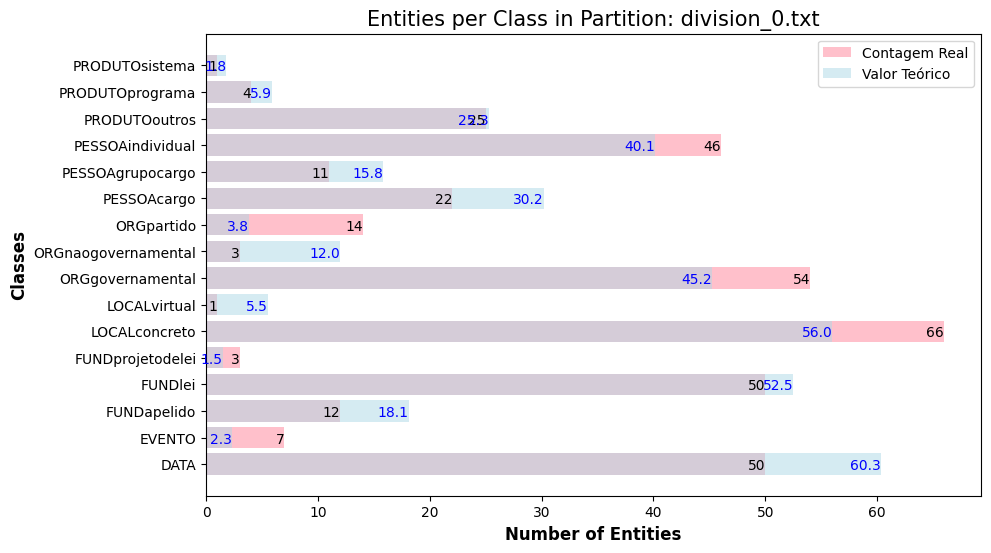

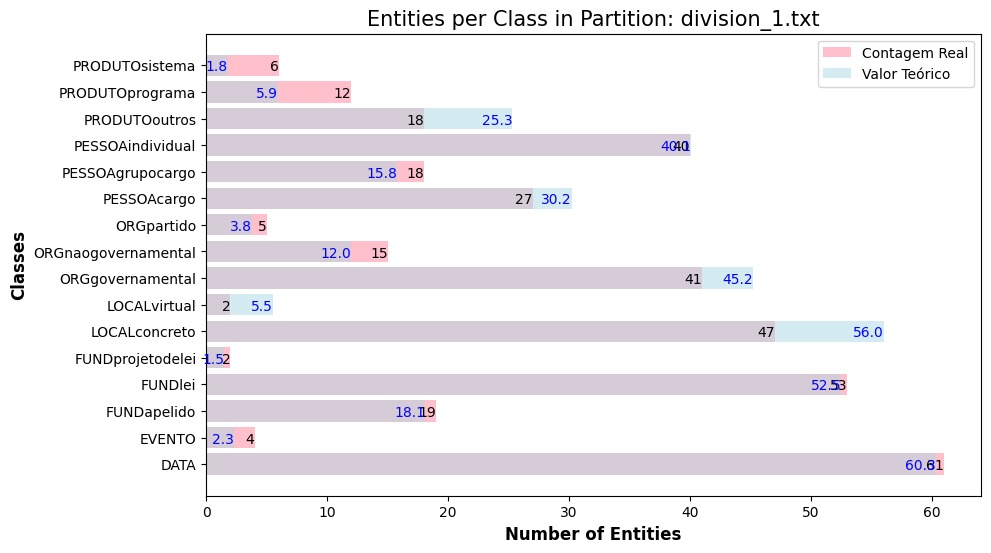

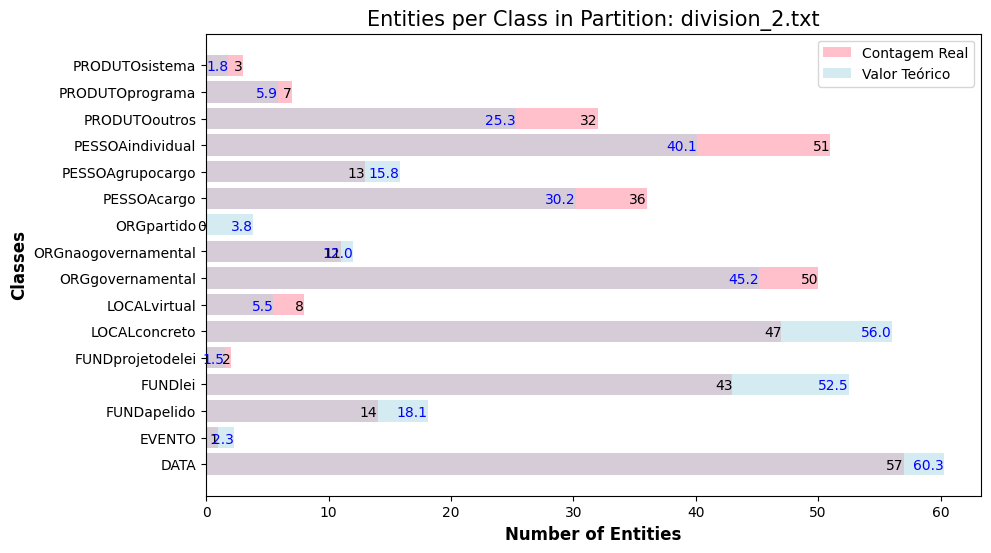

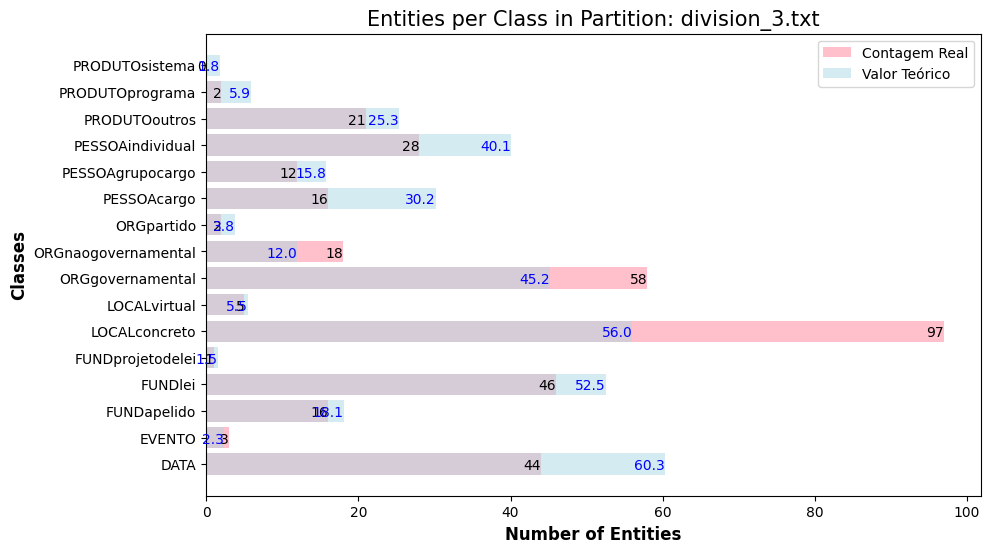

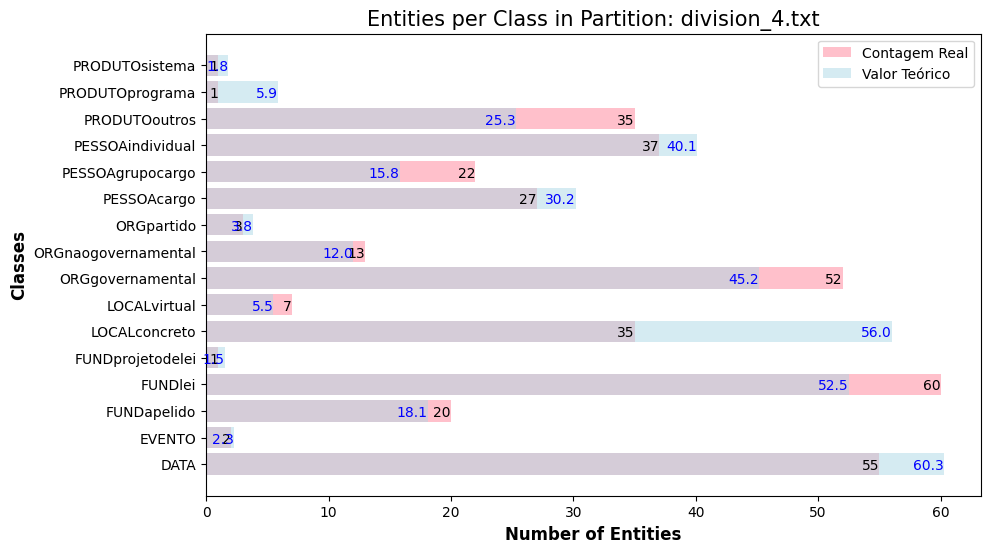

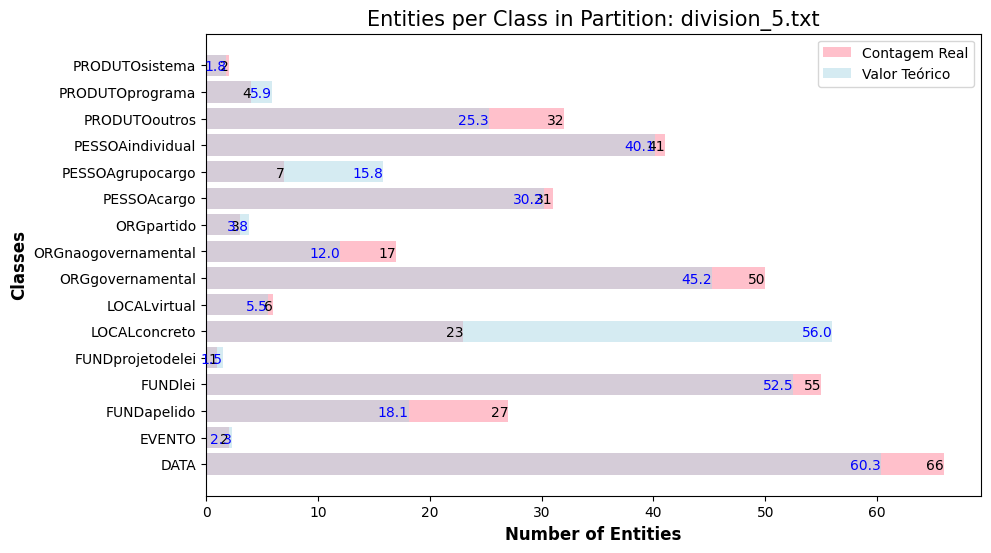

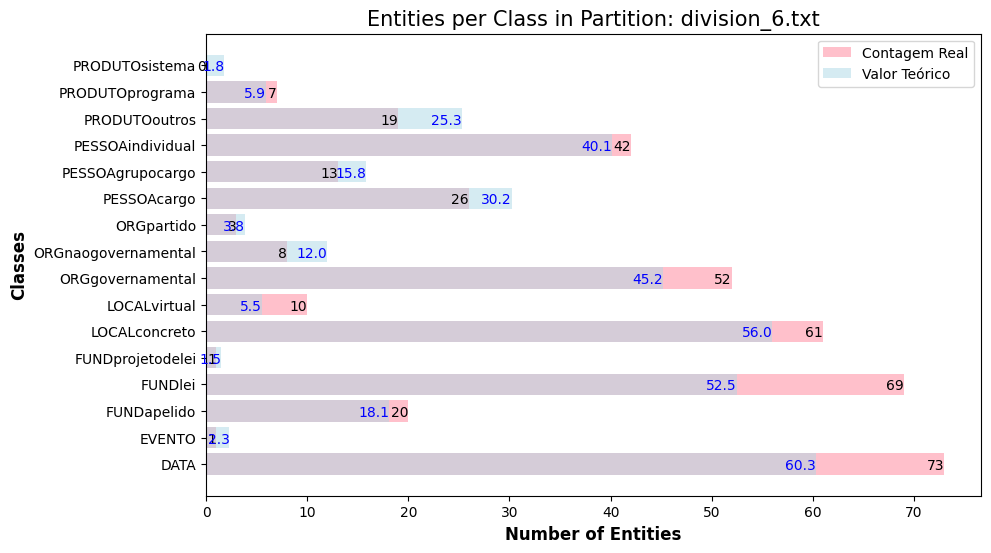

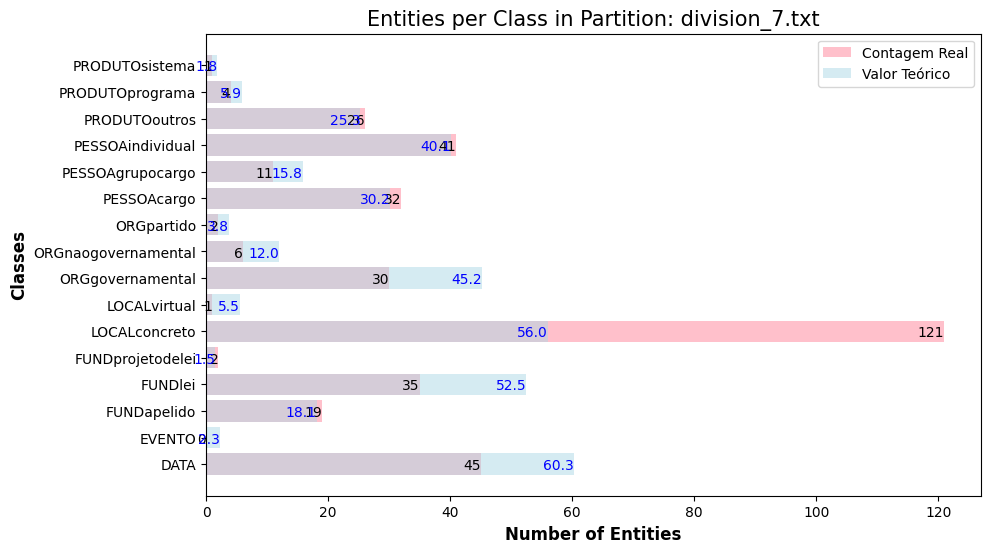

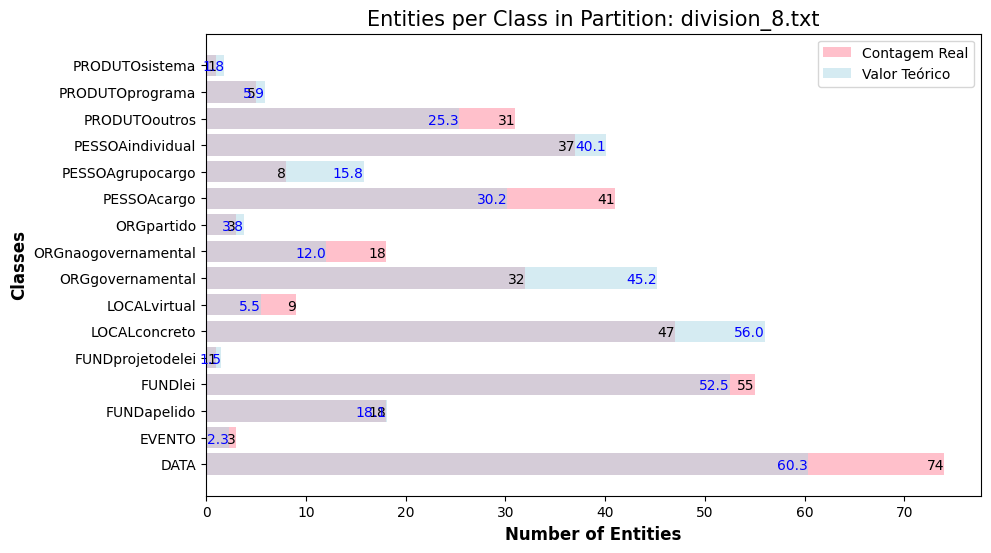

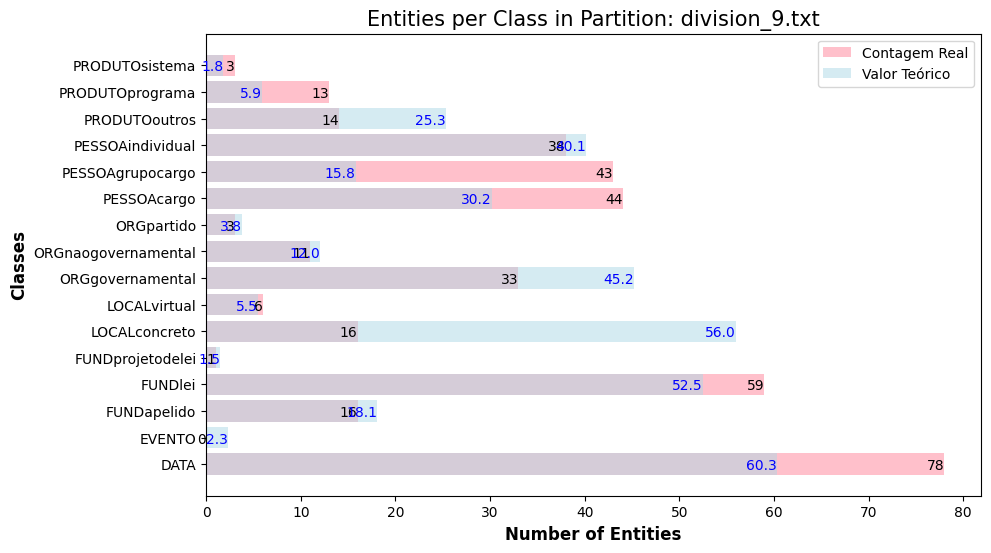

In [1]:
import os
from collections import Counter
import matplotlib.pyplot as plt
import re

# Diretório onde as partições estão salvas
base_dir = "../Base de Dados/UlyssesNER-BR/divisions/iterative/"

number_divisions = 10

# Inicializar lista para as classes teóricas
unique_lbl_list = []

# Lista de abreviações
abbreviations = r"\b(?:Sr|S|Sra|Dr|Prof|Eng|Mme|Mestre|Vº|Vª)\.$"  # Abreviações que não devem terminar uma sentença
pattern = r"[.!?](\s|$)"  # Verifica ponto, exclamação ou interrogação seguidos de espaço ou fim da linha

# Contadores gerais
total_counts = Counter()
total_sentences_por_div = {}
total_tokens_por_div = {}

for file_name in sorted(os.listdir(base_dir)):
    if file_name.startswith("division_"):
        partition_path = os.path.join(base_dir, file_name)
        with open(partition_path, 'r', encoding='utf-8') as file:
            sentence_count = 0
            token_count = 0
            for line in file:
                line = line.strip()
                if line:
                    token_data = line.split()
                    label = token_data[-1]
                    token_count += 1  # Contando tokens
                    if label.startswith("B-"):  # Considerar apenas os rótulos com prefixo 'B-'
                        simplified_label = label.split("-")[-1]
                        unique_lbl_list.append(simplified_label)
                        total_counts[simplified_label] += 1
                    
                    # Verificar se a linha termina com ponto, exclamação ou interrogação
                    # e garantir que não seja uma abreviação
                    if re.search(pattern, line) and not re.search(abbreviations, line):
                        sentence_count += 1
            
            total_sentences_por_div[file_name] = sentence_count
            total_tokens_por_div[file_name] = token_count

# Obter classes teóricas únicas e ordenadas
classes_teoricas = sorted(set(unique_lbl_list))

# Calcular os valores teóricos dividindo as contagens totais por número de divisões
valores_teoricos = [total_counts[cls] / number_divisions for cls in classes_teoricas]

# Inicializando dicionários para armazenar contagens por partição
qtd_classes_por_div = {}
total_entidades_por_div = {}

# Iterar novamente pelas partições para calcular os valores reais
for file_name in sorted(os.listdir(base_dir)):
    if file_name.startswith("division_"):
        partition_path = os.path.join(base_dir, file_name)

        # Inicializar contador para esta partição
        labels_count = Counter()

        with open(partition_path, 'r', encoding='utf-8') as file:
            for line in file:
                line = line.strip()
                if line:
                    token_data = line.split()
                    label = token_data[-1]
                    if label.startswith("B-"):  # Considerar apenas os rótulos com prefixo 'B-'
                        simplified_label = label.split("-")[-1]
                        labels_count[simplified_label] += 1

        # Armazenar as contagens para a partição atual
        qtd_classes_por_div[file_name] = labels_count
        total_entidades_por_div[file_name] = sum(labels_count.values())

# Calculando o total geral de todas as partições
total_entidades_geral = sum(total_entidades_por_div.values())
total_sentences_geral = sum(total_sentences_por_div.values())
total_tokens_geral = sum(total_tokens_por_div.values())

# Exibindo os totais por partição e o total geral
print("Totais de entidades, sentenças e tokens por partição:")
for div_name in total_entidades_por_div:
    print(f"  {div_name}: {total_entidades_por_div[div_name]} entidades, "
          f"{total_sentences_por_div[div_name]} sentenças, "
          f"{total_tokens_por_div[div_name]} tokens")
print(f"\nTotal geral de entidades: {total_entidades_geral}")
print(f"Total geral de sentenças: {total_sentences_geral}")
print(f"Total geral de tokens: {total_tokens_geral}\n")

# Gerando os gráficos para cada partição
for div_name, labels_count in qtd_classes_por_div.items():
    # Ordenar as contagens conforme as classes teóricas
    qtd = [labels_count.get(cls, 0) for cls in classes_teoricas]

    plt.figure(figsize=(10, 6))
    bars_real = plt.barh(classes_teoricas, qtd, color="pink", label="Contagem Real")
    bars_teorico = plt.barh(classes_teoricas, valores_teoricos, color="lightblue", alpha=0.5, label="Valor Teórico")

    # Adicionando os valores nas barras
    for i, count in enumerate(qtd):
        plt.text(count, i, str(count), va="center_baseline", ha="right", fontsize=10)

    for i, teorico in enumerate(valores_teoricos):
        if teorico > 0:
            plt.text(teorico, i, f"{teorico:.1f}", va="center_baseline", ha="right", fontsize=10, color="blue")

    plt.title(f"Entities per Class in Partition: {div_name}", fontsize=15)
    plt.xlabel("Number of Entities", fontweight="bold", fontsize=12)
    plt.ylabel("Classes", fontweight="bold", fontsize=12)

    plt.legend()

    # Salvando o gráfico
    output_path = os.path.join(base_dir, f"entities_per_class_{div_name}.png")
    plt.savefig(output_path, dpi=300, format="png", bbox_inches="tight")
    print(f"Gráfico salvo: {output_path}")

print("Todos os gráficos foram gerados e salvos com sucesso!")
